# Analyzing Adaptation Success of Second Generation Immigrant Children of America

## Final Resource
#### John Diego, Huy Nguyen, Jessica Ro, Jason Xu



__ Historically, immigrants arrive in America for various reasons - some immigrate to escape political persecution, and some immigrate due to economic opportunities. Arriving in a new country, these families go through an adaptation process.__ 

__To explore the success of second wave immigrant we looked at two specific aspects - Their success in terms of professional careers they achieve at an older age, and family income based on the parents contribution only. Below are the three specific questions we seeked to analyze.__ 


Q1: How does the parent’s educational, work, and language background affect family income? 

Q2: Does speaking english give greater mobility to family? 

Q3: How does the previous relationships(Q1 and Q2) look like if we were to view it from the perspective of the Hmong and Vietnamese?  



In [65]:

# Set up

import numpy as np
import pandas as pd
import seaborn as sns # for visualiation
from urllib.request import urlopen
import statsmodels.formula.api as smf # linear modeling
import matplotlib.pyplot as plt # plotting
import matplotlib
import statsmodels.api as sm
import statsmodels.formula.api as amf
import plotly.graph_objs as go
import plotly.plotly as py
import plotly.tools as tls
py.sign_in('jessro95', 'QLqhsISQzdI2aJUEKNky')


matplotlib.style.use('ggplot')
%matplotlib inline 

In [71]:
#Cleaned Data For Q1 & Q3. Cleaned by R
df_income = pd.read_csv('data/parent.edu.income.csv')
vdf = pd.read_csv('data/vietnam.parent.edu.income.csv')
hdf = pd.read_csv('data/hmong.parent.edu.income.csv')

## Q1: How does the parent’s educational, work, and language background affect family income? 

Parents play a huge factor in the success of their children's success. One way of measuring socioeconomic status and success is through family income. This question specifically targets parent's income that was self reported by respondents. Aside from monthly income, the other three variables we chose were work, language background and education level of the parents.

Based on previous background knowledge and intuition, we have made the following hypothesis for question 2: The parent's educational, work, and language background affect family income positively.
Although our hypothesis for question 1 is that The parent's educational, work, and language background does not play any role in influencing the family income.
In order to test our hypothesis, we conducted data analysis and data cleaning technique to understand the data better. The following dataframe and graphs summarize aspects of the data.

# Simple Linear Regression


We first ran a Simple Linear Regression to see whether there are correlation and significance between family's monthly income and English background. Variable mi indicates family's monthly income, and variable english indicates the English background of the parent which was computed by finding mean levels of English readability, writability, understandability and speakability which ranged from 1 (Very Little) to 4 (Very Well), that were self- reported by the interviewees. 

In [72]:

lm = smf.ols(formula='mi~english', data=df_income).fit()
df_income['preds'] = lm.predict()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mi   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     455.3
Date:                Wed, 08 Mar 2017   Prob (F-statistic):           4.09e-92
Time:                        04:10:51   Log-Likelihood:                -20077.
No. Observations:                2244   AIC:                         4.016e+04
Df Residuals:                    2242   BIC:                         4.017e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -895.3105    118.727     -7.541      0.000     -1128.138  -662.483
english      857.3989     40.184     21.337      0.000       778.597   936.201
==============================================================================
Omnibus:                     1872.335   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71257.565
Skew:                           3.716   Prob(JB):                         0.00
Kurtosis:                      29.587   Cond. No.                         9.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

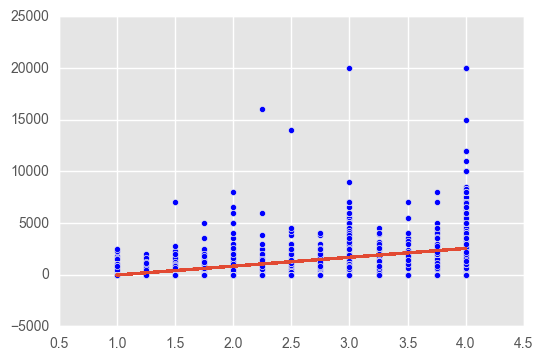

In [73]:
plt.scatter(df_income.english, df_income.mi)
plt.plot(df_income.english, df_income.preds)
plt.show()

# Multiple Linear Regression

In [74]:
lm_mult = smf.ols(formula='mi~ea + english + work', data=df_income).fit()
df_income['mult_preds'] = lm_mult.predict()
lm_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mi   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     378.7
Date:                Wed, 08 Mar 2017   Prob (F-statistic):          6.07e-199
Time:                        04:10:52   Log-Likelihood:                -19824.
No. Observations:                2244   AIC:                         3.966e+04
Df Residuals:                    2240   BIC:                         3.968e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    742.7010    136.836      5.428      0.000       474.362  1011.040
ea           150.2870     13.994     10.740      0.000       122.845   177.729
english      250.0241     46.759      5.347      0.000       158.329   341.720
work        -272.7578     14.111    -19.330      0.000      -300.429  -245.086
==============================================================================
Omnibus:                     2156.756   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           126662.891
Skew:                           4.495   Prob(JB):                         0.00
Kurtosis:                      38.691   Cond. No.                         30.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

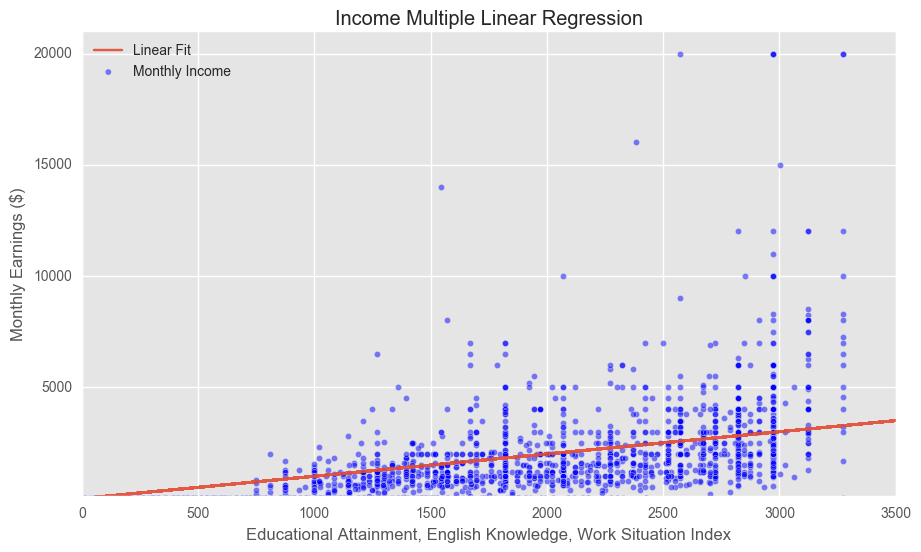

In [75]:
#Plot of multiple linear regression
fig, ax = plt.subplots(figsize=(10.5,6))
ax.scatter(df_income.mult_preds, df_income.mi, label='Monthly Income', alpha=0.5)
ax.plot(df_income.mi, df_income.mi, label='Linear Fit', alpha=0.9)
ax.set_title('Income Multiple Linear Regression')
ax.set_xlabel('Educational Attainment, English Knowledge, Work Situation Index')
ax.set_ylabel('Monthly Earnings ($)')
ax.legend(numpoints=1, loc='upper left')
plt.xlim([0, 3500])
plt.ylim([100, 21000])
plt.show()

# Data Preparation 

The dataset was retrieved from [the Children of Immigrants Longitudinal study](http://www.icpsr.umich.edu/icpsrweb/DSDR/studies/20520) that observed the adaptation process of second-generation immigrants from 1991 to 2006. Over 5200 immigrant second generation children born in the United States with at least one foreign-born parent, or children born abroad but brought to the United States at an early age were interviewed at three stages of their lives, at an average of 14, 17, and 24. After the first follow-up survey of immigrant children, a parental survey was conducted, receiving 2,442, or 46 percent of the original student sample interviewed. Data was collected through face-to-face interviews and paper and pencil interviews. The data contains 5262 observations(cases), with 665 features for each caseid.



In [66]:
#Read data
df = pd.read_csv('data/20520-0001-Data.tsv', sep='\t');
print(df.shape)
#Extract Third Phase Data from whole dataset (v400~v450 + CaseID) &  parental dataset.
df_thirdPhase = df.loc[:, 'v400':'CASEID']
df_thirdPhase = pd.concat([df_thirdPhase, df[['p144','p28a', 'p28b', 'p28c', 'p28d', 'v21']]], axis=1)

#drop rows that does not have data on Third Phase (v400 == 0 are responses not for Third Phase)
df_thirdPhase = df_thirdPhase[df_thirdPhase['v400'] == 1]


//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (4,15,16,18,19,21,22,23,24,25,51,67,101,107,115,117,119,121,123,129,135,136,137,522,524,542,545,611,663) have mixed types. Specify dtype option on import or set low_memory=False.



(5262, 665)


In [67]:

#Changing column names
df_needed = df_thirdPhase[['v21', 'p144','p28a', 'p28b', 'p28c', 'p28d', 'v407a', 'v415e', 'v428b', 'v429a','v429b', 'v429c','v429d',  'v431', 'v433', 'v434', 'v435', 'v444', 'v445', 'v447', 'CASEID']];
df_needed.columns = ['origin' , 'ParentsScore', 'ParentSpeak', 'ParentUnderstand', 'ParentRead', 'ParentWrite', 'Highest_academic_years', 'curJobScore' ,'non_English_understandability','English_speakability','English_understandability','English_readability','English_writability', 'most spoken language','race', 'race identity importance', 'felt_discrimination',  'visits to parents country', 'lived in parents country', 'home country', 'caseid']

#Drop datas without Pristige Job Score and Parent's Pristiege job score
df_three = df_needed[(df_needed.curJobScore != ' ')  & (df_needed.ParentsScore != ' ')]


#Change the dataType to num from string
numToStrings = ['felt_discrimination','non_English_understandability','English_understandability','Highest_academic_years',
                'curJobScore', 'ParentsScore', 'English_speakability','English_understandability', 
                'English_readability', 'English_writability', 'ParentWrite','ParentSpeak', 
                'ParentUnderstand', 'ParentRead']

for nam in numToStrings:
    df_three[nam] = pd.to_numeric(df_three[nam], errors = 'coerce')



//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



### Question 2: Does having better English ability give greater mobility to family?

Based on previous background knowledge and intuition, we have made the following hypothesis for question 2: does having better English ability give greater mobility to family.

Hypothesis for question 2: Having better English level does give greater mobility to family.
Although our hypothesis for question 2 is that having better English level does give greater social mobility to family, our null hypothesis is that English level plays no role in influencing the mobility of familiy.
In order to test our hypothesis, we conducted data analysis and data cleaning technique to understand the data bette. The following dataframe and graphs summarize aspects of the data.

New variables of diff, English, ParentEnglish, and LangDiff were created. English and ParentEnglish which indicate the overall English language level, were computed by finding the mean score of speaking, reading, writing, understanding levels ranging from 1 (Very Little) to 4 (Very Well) that interviewees self-indicated. LangDiff was computed by finding the difference between Child's English level and ParentEnglish level. Diff was computed by the difference between Treiman prestige job score of child and parent. Treiman prestige job score describes the relative social class positions people have, with a higher score meaning higher social ranking job than others.

In [68]:
    
#Drop null values
dropNullNames = ['ParentWrite', 'ParentRead', 'ParentSpeak', 'ParentUnderstand']    

for name in dropNullNames: df_three = df_three[np.isfinite(df_three[name])]


#Create diff column that is the difference between Parent's Prestiege score and child's prestiege score
df_three['diff'] = df_three.curJobScore - df_three.ParentsScore

#Create English variable that is the average of writability, readability, understandability, and speakability of the immigrant child at age over 24
df_three['English'] = (df_three.English_writability + df_three.English_readability + 
                       df_three.English_understandability + df_three.English_speakability) / 4

#Create ParentEnglish variable that is the average of writability, readability, understandability, and speakability of the immigrant parent
df_three['ParentEnglish'] = (df_three.ParentRead + df_three.ParentUnderstand + df_three.ParentSpeak + 
                             df_three.ParentWrite) / 4

#Create LangDiff variable that is the difference between Child's English level and Parent's English level
df_three['LangDiff'] = df_three.English - df_three.ParentEnglish




In [69]:
#Data Structure

#size of the dataframe
print(np.shape(df_three))

#variable names
list(df_three)

#Summary
df_three.describe()

(884, 25)


,origin,ParentsScore,ParentSpeak,ParentUnderstand,ParentRead,ParentWrite,Highest_academic_years,curJobScore,non_English_understandability,English_speakability,English_understandability,English_readability,English_writability,felt_discrimination,caseid,diff,English,ParentEnglish,LangDiff
count,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,870.000000,884.000000,769.000000,843.000000,844.000000,843.000000,708.000000,874.000000,884.000000,884.000000,704.00000,884.000000,704.000000
mean,14.750000,41.985294,3.091629,3.233032,3.133484,3.002262,14.480460,45.005656,3.585176,3.883749,3.921801,3.895611,3.824859,0.532037,1592.687783,3.020362,3.87642,3.115102,0.777699
std,14.370039,12.728047,0.869502,0.786347,0.915606,1.002825,1.686325,11.516937,0.673794,0.378469,0.317237,0.359489,0.435813,0.499258,941.874511,16.113261,0.33760,0.850838,0.870906
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,10.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.000000,-47.000000,1.00000,1.000000,-3.000000
25%,2.000000,32.000000,2.000000,3.000000,3.000000,2.000000,14.000000,37.000000,3.000000,4.000000,4.000000,4.000000,4.000000,0.000000,807.250000,-9.000000,4.00000,2.500000,0.000000
50%,7.000000,42.000000,3.000000,3.000000,3.000000,3.000000,14.500000,44.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1534.500000,3.000000,4.00000,3.000000,1.000000
75%,30.000000,53.000000,4.000000,4.000000,4.000000,4.000000,16.000000,53.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,2337.500000,14.000000,4.00000,4.000000,1.250000
max,60.000000,78.000000,4.000000,4.000000,4.000000,4.000000,18.000000,78.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,5261.000000,49.000000,4.00000,4.000000,3.000000


The data structure shows that there are 884 cases left after dropping null values for parents' data, current Treiman job score, and third phase survey data. This shows that the retention rate for third phase was less than 20% of the initial interviewees. 

# Linear regression

Ordinary Least Squares(OLS) was used to analyze the research question #2, because OLS is the best known of all regression technique, and it is a good starting point to see the correlation and relationship between two variables. Treiman Job Score Difference and English Level Difference taken from immigrant children's third-phase survey and parents' survey were used to run the regression.

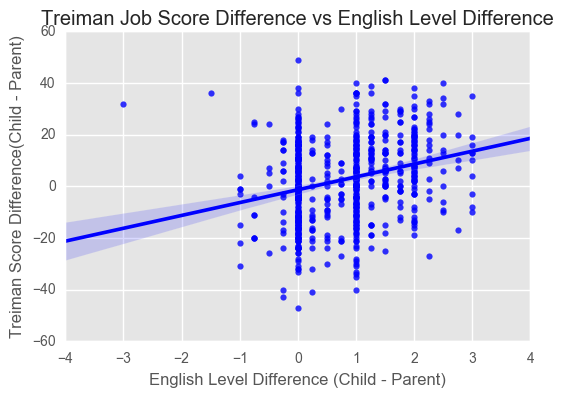

                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     54.30
Date:                Wed, 08 Mar 2017   Prob (F-statistic):           4.84e-13
Time:                        04:10:51   Log-Likelihood:                -2931.2
No. Observations:                 704   AIC:                             5866.
Df Residuals:                     702   BIC:                             5875.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.3486      0.788     -1.712      0.0

In [70]:
eng = smf.ols(formula = 'diff ~ LangDiff', data =df_three).fit()
mobeng = sns.regplot(x= df_three['LangDiff'], y= df_three['diff'], data=df_three, color = 'b')
mobeng.set(xlabel = 'English Level Difference (Child - Parent)', ylabel = 'Treiman Score Difference(Child - Parent)')
mobeng.set_title("Treiman Job Score Difference vs English Level Difference")

plt.show()
### rater 1 summary
print(eng.summary())

Although the p-value for intercept was higher than .05, the p-value for Language difference was lower than .01, indicating that our data is significant and provides strong evidence against the null hypothesis, which is that English level plays no role in influencing the mobility of familiy. 
The regression showed that there are positive relationship between Language difference and the Treiman Job Score difference, indicating that better an immigrant child is in English than his/her parent, it is more likely that the child would have better job than does his/her parent. Since the immigrant children interviewed were second generation children born in the United States with at least one foreign-born parent, or children born abroad but brought to the United States at an early age, by the time they got interviewed for third-phase, it is highly likely that they have better English ability than does their parent; giving most of the data of English level difference on positive scale could have been the major factor for high p-value for intercept. 

### Q3: How does the previous relationships(Q1 and Q2) look like if we were to view it from the perspective of the Hmong and Vietnamese?  

We chose to narrow down our dataset and look specifically at the perspective of the Hmong and Vietnamese because Hmong and Vietnamese were one of the first Asian ethnic groups that immigrated to United States, and although each of them are categorized into each of their own one  ethnic groups, within their groups, there are variety of different groups, and therefore would give us interesting result. Hmong moved to many different origins before immigrating into US and Vietnamese immigrated to US located themselves at different places and the class and education levels were typically different depending on when they immigrated : first wave Vietnamese mostly had close ties to America or highly ranked in the government being well educated and high elites in the South Vietnamese government; whereas second wave Vietnamese had the economic hardship and were less educated than did the first wave Vietnamese. 



## Vietnam

### Simple Linear Regression

                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.998
Date:                Wed, 08 Mar 2017   Prob (F-statistic):              0.163
Time:                        04:10:53   Log-Likelihood:                -244.22
No. Observations:                  58   AIC:                             492.4
Df Residuals:                      56   BIC:                             496.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.4393      4.139      1.556      0.1

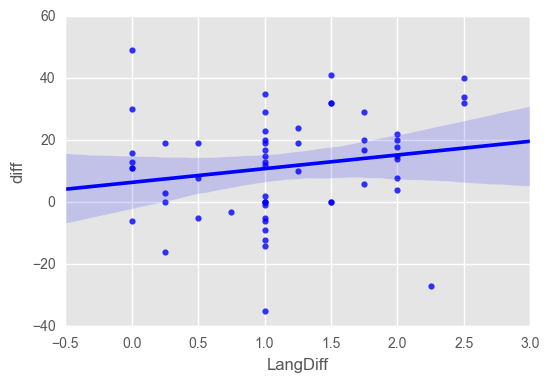

In [76]:
df_vietnam = df_three[df_three.origin == 31]
eng = smf.ols(formula = 'diff ~ LangDiff', data =df_vietnam).fit()
mobeng = sns.regplot(x= df_vietnam['LangDiff'], y= df_vietnam['diff'], data=df_vietnam, color = 'b')

### rater 1 summary
print(eng.summary())

In [77]:
v_lm_mult = smf.ols(formula='mi~ea + english + work', data=vdf).fit()
vdf['mult_preds'] = v_lm_mult.predict()
v_lm_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mi   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     104.9
Date:                Wed, 08 Mar 2017   Prob (F-statistic):           9.28e-44
Time:                        04:10:53   Log-Likelihood:                -2142.1
No. Observations:                 250   AIC:                             4292.
Df Residuals:                     246   BIC:                             4306.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    919.5704    409.056      2.248      0.025       113.872  1725.269
ea           122.9277     39.406      3.120      0.002        45.312   200.543
english      588.3067    162.713      3.616      0.000       267.819   908.794
work        -328.9156     32.288    -10.187      0.000      -392.513  -265.319
==============================================================================
Omnibus:                       63.364   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.144
Skew:                           1.174   Prob(JB):                     9.17e-34
Kurtosis:                       6.015   Cond. No.                         32.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

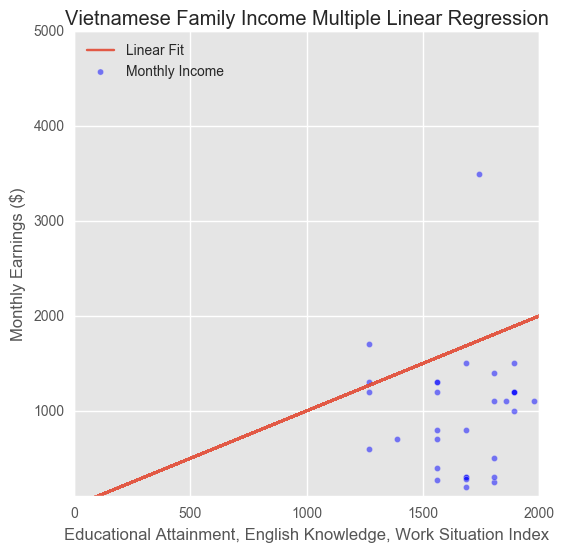

In [78]:
#Plot of multiple linear regression
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(vdf.mult_preds, vdf.mi, label='Monthly Income', alpha=0.5)
ax.plot(vdf.mi, vdf.mi, label='Linear Fit', alpha=0.9)
ax.set_title('Vietnamese Family Income Multiple Linear Regression')
ax.set_xlabel('Educational Attainment, English Knowledge, Work Situation Index')
ax.set_ylabel('Monthly Earnings ($)')
ax.legend(numpoints=1, loc='upper left')
plt.xlim([0, 2000])
plt.ylim([100, 5000])
plt.show()


## Hmong

### Simple Linear Regression

//anaconda/lib/python3.5/site-packages/statsmodels/stats/stattools.py:72: UserWarning:

omni_normtest is not valid with less than 8 observations; 4 samples were given.



                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     4.322
Date:                Wed, 08 Mar 2017   Prob (F-statistic):              0.173
Time:                        04:10:55   Log-Likelihood:                -8.4650
No. Observations:                   4   AIC:                             20.93
Df Residuals:                       2   BIC:                             19.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     15.4246      2.824      5.461      0.0

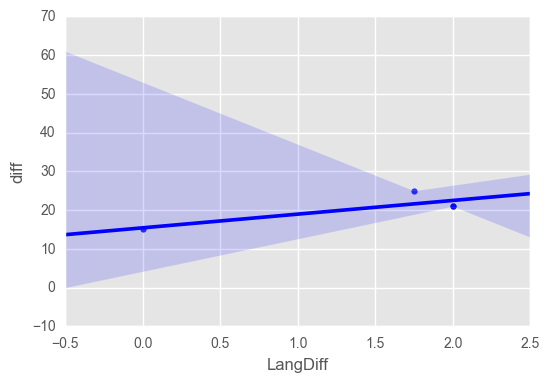

In [79]:
df_hmong = df_three[df_three.origin == 34]
eng = smf.ols(formula = 'diff ~ LangDiff', data =df_hmong).fit()
mobeng = sns.regplot(x= df_hmong['LangDiff'], y= df_hmong['diff'], data=df_hmong, color = 'b')

### rater 1 summary
print(eng.summary())

In [80]:
h_lm_mult = smf.ols(formula='mi~ea + english + work', data=hdf).fit()
hdf['mult_preds'] = h_lm_mult.predict()
h_lm_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mi   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     15.49
Date:                Wed, 08 Mar 2017   Prob (F-statistic):           6.92e-07
Time:                        04:10:56   Log-Likelihood:                -343.18
No. Observations:                  45   AIC:                             694.4
Df Residuals:                      41   BIC:                             701.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    963.3976    413.272      2.331      0.025       128.777  1798.018
ea            44.9939     46.740      0.963      0.341       -49.399   139.387
english      128.6924    172.008      0.748      0.459      -218.684   476.069
work        -210.8898     46.329     -4.552      0.000      -304.454  -117.326
==============================================================================
Omnibus:                        2.859   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.120
Skew:                           0.527   Prob(JB):                        0.346
Kurtosis:                       3.145   Cond. No.                         28.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

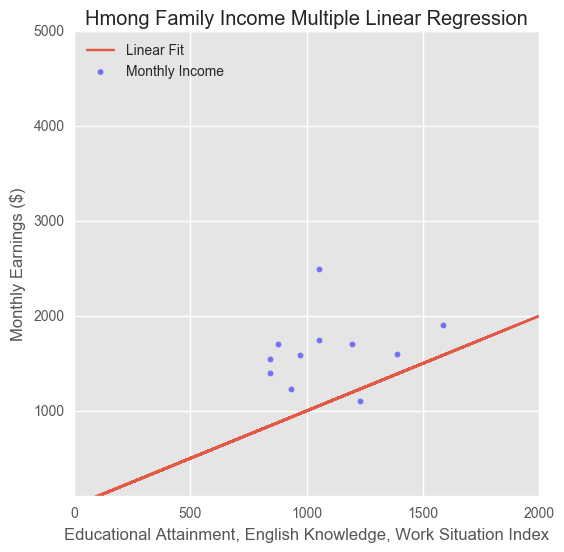

In [81]:
#Plot of multiple linear regression
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(hdf.mult_preds, hdf.mi, label='Monthly Income', alpha=0.5)
ax.plot(hdf.mi, hdf.mi, label='Linear Fit', alpha=0.9)
ax.set_title('Hmong Family Income Multiple Linear Regression')
ax.set_xlabel('Educational Attainment, English Knowledge, Work Situation Index')
ax.set_ylabel('Monthly Earnings ($)')
ax.legend(numpoints=1, loc='upper left')
plt.xlim([0, 2000])
plt.ylim([100, 5000])
plt.show()